In [40]:
# !apt install fonts-noto fonts-noto-cjk* fonts-droid-fallback

In [41]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

print('matplotlib:', matplotlib.__version__)

matplotlib: 3.5.1


In [42]:
# 列出能用的字体
import subprocess

mat_fonts = set(f.name for f in matplotlib.font_manager.FontManager().ttflist)

output = subprocess.check_output('fc-list :lang=zh -f "%{family}\n"', shell=True)
output = output.decode('utf-8')
# print '*' * 10, '系统可用的中文字体', '*' * 10
# print output
zh_fonts = set(f.split(',', 1)[0] for f in output.split('\n'))
available = mat_fonts & zh_fonts

print('*' * 10, '可用的字体', '*' * 10)
for f in available:
    print(f)

********** 可用的字体 **********


In [43]:
# 将中文字体放在备选字体首位

# ********** 可用的字体 **********
# AR PL UMing CN
# Noto Sans CJK JP
# AR PL UKai CN
# Noto Serif CJK JP
# Droid Sans Fallback

fonts = matplotlib.rcParamsDefault['font.sans-serif'].copy()
fonts.insert(0, 'Droid Sans Fallback')
fonts.insert(0, 'Noto Sans CJK JP')
matplotlib.rcParams['font.sans-serif'] = fonts
print('<font.sans-serif>: ', matplotlib.rcParams['font.sans-serif'])

fonts = matplotlib.rcParamsDefault['font.serif'].copy()
fonts.insert(0, 'Droid Sans Fallback')
fonts.insert(0, 'Noto Serif CJK JP')
matplotlib.rcParams['font.serif'] = fonts
print('<font.serif>: ', matplotlib.rcParams['font.serif'])

fonts = matplotlib.rcParamsDefault['font.monospace'].copy()
fonts.insert(0, 'Droid Sans Fallback')
matplotlib.rcParams['font.monospace'] = fonts
print('<font.monospace>: ', matplotlib.rcParams['font.monospace'])

<font.sans-serif>:  ['Noto Sans CJK JP', 'Droid Sans Fallback', 'DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif']
<font.serif>:  ['Noto Serif CJK JP', 'Droid Sans Fallback', 'DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times New Roman', 'Times', 'Palatino', 'Charter', 'serif']
<font.monospace>:  ['Droid Sans Fallback', 'DejaVu Sans Mono', 'Bitstream Vera Sans Mono', 'Computer Modern Typewriter', 'Andale Mono', 'Nimbus Mono L', 'Courier New', 'Courier', 'Fixed', 'Terminal', 'monospace']


In [44]:
# matplotlib.rc('font', family='Noto Serif CJK JP')

In [45]:
cases = [
  3,7,5,8,19,28,10,12,18,19,
  55,83,65,169,139,202,158,260,374,
  509,758,896,981,983,1609,2269,2676,3500,4477,5982,5653,
  4502,6311,8226,9006,13354,17077,19982,21222,23624,24943,
  26087,23342,26330,27719,23072,23513,3238+21582,2417+19831,3084+17332,2494+16407,
  2634+15861,
]

begin_date = '2022-03-01'

In [46]:
df = pd.DataFrame({'new_cases': cases}, index=pd.date_range(begin_date, periods=len(cases), freq='D'))
df.tail()

,new_cases
2022-04-17,24820
2022-04-18,22248
2022-04-19,20416
2022-04-20,18901
2022-04-21,18495


In [58]:
df.new_cases.iloc[-1]

18495

In [69]:
title = df.index.max().strftime('%Y年%m月%d日') + "更新\n新增{}阳性".format(df.new_cases.iloc[-1])

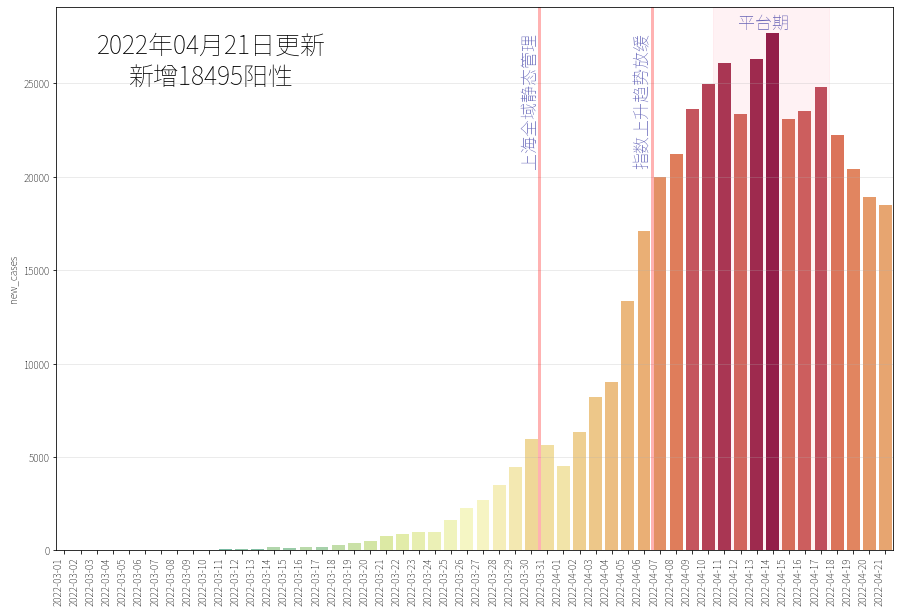

In [71]:
fig, ax = plt.subplots(figsize = (15,10))


from datetime import datetime

ax.grid(True, which='major', axis='y', alpha=0.3)

#     '上海全域静态管理'
plt.text(
    (datetime.fromisoformat('2022-03-31') - datetime.fromisoformat(begin_date)).days-0.5,
    max(cases),
    '上海全域静态管理',
    rotation=90,
    horizontalalignment='right',
    verticalalignment='top',
    multialignment='center',
    size=17,
    color='darkblue',
    alpha=0.6
    )

plt.axvline(
    (datetime.fromisoformat('2022-03-31') - datetime.fromisoformat(begin_date)).days-0.5,
    0,max(cases),
    linestyle='-', linewidth=3, color='red', alpha=0.3,
    )

#     '指数上升趋势放缓'
plt.text(
    (datetime.fromisoformat('2022-04-07') - datetime.fromisoformat(begin_date)).days-0.5,
    max(cases),
    '指数上升趋势放缓',
    rotation=90,
    horizontalalignment='right',
    verticalalignment='top',
    multialignment='center',
    size=17,
    color='darkblue',
    alpha=0.6
    )


plt.axvline(
    (datetime.fromisoformat('2022-04-07') - datetime.fromisoformat(begin_date)).days-0.5,
    0,max(cases),
    linestyle='-', linewidth=3, color='red', alpha=0.3,
    )

#     '平台期'
plt.axvspan(
    (datetime.fromisoformat('2022-04-11') - datetime.fromisoformat(begin_date)).days-0.7,
    (datetime.fromisoformat('2022-04-17') - datetime.fromisoformat(begin_date)).days+0.5,
    color='pink', alpha=0.2,
    )

plt.text(
    (datetime.fromisoformat('2022-04-11') - datetime.fromisoformat(begin_date)).days+4,
    max(cases),
    '平台期',
    rotation=0,
    horizontalalignment='right',
    verticalalignment='bottom',
    multialignment='center',
    size=17,
    color='darkblue',
    alpha=0.6
    )


# bar color
pal = sns.color_palette('Spectral', len(cases))
rank = df.new_cases.argsort().argsort()
# 画 bar 图
g = sns.barplot(x=df.index, y='new_cases', alpha=1, palette=np.array(pal[::-1])[rank], data=df, ax=ax)

plt.text(
    2,
    max(cases),
    title,
    rotation=0,
    horizontalalignment='left',
    verticalalignment='top',
    multialignment='center',
    size=25,
    fontweight='bold',
    color='black',
    alpha=1
    )

# X 轴日期格式调整
x_dates = df.index.strftime('%Y-%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right')

plt.show()